# Chapter9

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [4]:
dbscan.labels_[:10]

array([ 0,  1,  2, -1,  3,  1,  4,  0,  2,  1], dtype=int64)

In [5]:
len(dbscan.core_sample_indices_)

797

In [9]:
dbscan.core_sample_indices_[:10]

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 11], dtype=int64)

In [7]:
dbscan.components_

array([[ 1.06205234, -0.43064113],
       [ 0.31059222,  0.96260532],
       [ 1.85851666, -0.02852261],
       ...,
       [ 0.85868043, -0.51598318],
       [ 1.41719203, -0.35095055],
       [-1.00566979,  0.12030696]])

# Chapter10.

In [11]:
import tensorflow as tf
from tensorflow import keras

tf.__version__
keras.__version__

'2.4.0'

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [13]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [15]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Coat'

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1349 - accuracy: 0.9521 - val_loss: 0.3063 - val_accuracy: 0.8988
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1326 - accuracy: 0.9534 - val_loss: 0.2920 - val_accuracy: 0.8996
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1301 - accuracy: 0.9544 - val_loss: 0.2995 - val_accuracy: 0.8998
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1286 - accuracy: 0.9547 - val_loss: 0.3106 - val_accuracy: 0.8994
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1263 - accuracy: 0.9558 - val_loss: 0.3092 - val_accuracy: 0.8990
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1241 - accuracy: 0.9573 - val_loss: 0.3094 - val_accuracy: 0.8986
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1225 - accuracy: 0.9558 - val_loss: 0.3466 - val_accuracy:

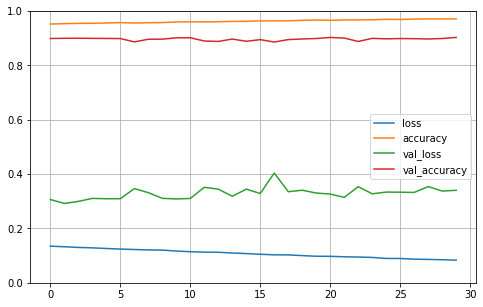

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 604us/step - loss: 4.4359 - accuracy: 0.1000


[4.435943126678467, 0.10000000149011612]

In [32]:
model.save('my_keras_model.h5')

In [34]:
model = keras.models.load_model('my_keras_model.h5')

In [35]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5')
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
1719/1719 [==============================] - 2s 959us/step - loss: 0.0834 - accuracy: 0.1014
Epoch 2/10
1719/1719 [==============================] - 2s 999us/step - loss: 0.0805 - accuracy: 0.1017
Epoch 3/10
1719/1719 [==============================] - 2s 956us/step - loss: 0.0792 - accuracy: 0.1015
Epoch 4/10
1719/1719 [==============================] - 2s 983us/step - loss: 0.0771 - accuracy: 0.1013
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0767 - accuracy: 0.1013
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0754 - accuracy: 0.1017
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0748 - accuracy: 0.1016
Epoch 8/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0729 - accuracy: 0.1014
Epoch 9/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0711 - accuracy: 0.1011
Epoch 10/10
1719/1719 [==============================] - 2s 1ms/step - los